<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Ecuaci%C3%B3n_de_calor_con_LU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Método implícito de Richardson**

Vamos a resolver la ecuacion de calor utilizando el metodo implicito en diferencias finitas

Siendo
$$\frac{\partial u}{\partial t} = \alpha^2 \frac{\partial^2 u}{\partial x^2}$$
con su condicion inicial
$$u(x, 0) = f(x) = \sin(\pi x)$$
y su condicion de frontera
$$u(0, t) = 0 \quad \text{y} \quad u(1, t) = 0$$
Usamos diferencias regresivas en el tiempo y diferencia central para el espacio, es decir
$$\frac{\partial u}{\partial t} \approx \frac{u_i^j - u_i^{j-1}}{k}
$$ y $$\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^j - 2u_i^j + u_{i-1}^j}{h^2}$$
Sustituyendo en la ecuacion de calor tenemos
$$\frac{u_i^j - u_i^{j-1}}{k} = \alpha^2 \left( \frac{u_{i+1}^j - 2u_i^j + u_{i-1}^j}{h^2} \right)$$
Haciendo  
 $$\lambda = \frac{\alpha^2 k}{h^2}$$

 Tenemos
 $$u_i^j - \lambda (u_{i+1}^j - 2u_i^j + u_{i-1}^j) = u_i^{j-1}$$
 Simplificando
 $$u_i^{j-1}= -\lambda u_{i-1}^j + (1 + 2\lambda)u_i^j - \lambda u_{i+1}^j$$

**Problema a resolver:**  


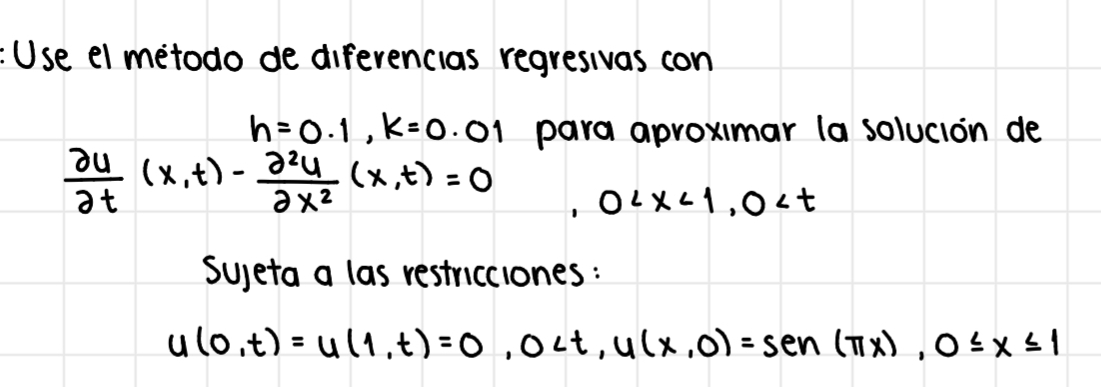

Dado el problema que vimos en clase, sabemos que  $$\alpha^2 = 1$$
Entonces tenemos $$\lambda = \frac{0.01}{(0.1)^2} = 1$$
Sustituimos a lambda en la ecuacion y asi tenemos
$$ -u_{i-1}^j + 3u_i^j - u_{i+1}^j = u_i^{j-1}$$

In [177]:
#Agregamos todas las librerias que se ocupan durante el programa
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [178]:
def f(x):
 return np.sin(np.pi*x) #Definimos la condición inicial u(x, 0) = sin(pi*x)

In [179]:
#Definimos la matriz A entrada por entrada
A = sp.Matrix([[3,-1,0,0,0,0,0,0,0],
               [-1,3,-1,0,0,0,0,0,0],
               [0,-1,3,-1,0,0,0,0,0],
               [0,0,-1,3,-1,0,0,0,0],
               [0,0,0,-1,3,-1,0,0,0],
               [0,0,0,0,-1,3,-1,0,0],
               [0,0,0,0,0,-1,3,-1,0],
               [0,0,0,0,0,0,-1,3,-1],
               [0,0,0,0,0,0,0,-1,3]])

In [180]:
A #Se imprime A para ver que si sea la matriz correcta

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

Ejercicio 1: Falicitamos la matriz A, para no tener que escribir cada entrada

In [181]:
# Definimos los parámetros
h = 0.1      # Paso espacial
k = 0.01     # Paso temporal
N = 9        # Tamaño de la matriz
lamb = 1   # Lamda que ya habiamos calculado antes
alpha_sq = 1 # Alfa calculado ya antes

In [182]:
# Creamos la matriz A de manera mas sencilla
def crear_matriz_A(N, lamb): #Esta parte genera una matriz tridiagonal A con el formato sympy
    main_diag_val = (1 + 2 * lamb)
    off_diag_val = -lamb

    # Creamos una matriz inicial de puros 0
    A = sp.zeros(N, N)
    # Llenamos la diagonal
    for i in range(N):
        A[i, i] = main_diag_val
    # Llenamos las entradas de la diagonal superior
    for i in range(N - 1):
        A[i, i + 1] = off_diag_val
    # Llenamos los datos de la diagonal inferior
    for i in range(N - 1):
        A[i + 1, i] = off_diag_val

    return A

# Generamos la matriz
A = crear_matriz_A(N, lamb)
A # Imprimimos la matriz A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [183]:
b = sp.Matrix([f(0.1),f(0.2),f(0.3),f(0.4),f(0.5),f(0.6),f(0.7),f(0.8),f(0.9)]) #Definimos las entradas de b

In [184]:
b #Imprimimos la matriz b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

Ejercicio 2: Definimos las entradas de b, pero ahora mas simple

In [185]:
#Creamos b mas simple
def crear_vector_b(N, h): #Aqui generamos b con la condición inicial y evaluando f(x) en cada nodo interno

    # Genera la lista de coordenadas x de los nodos internos
    x_nodes = [h * i for i in range(1, N + 1)]
    # Se evalua f(x) en cada nodo
    b_valores = [f(x_val) for x_val in x_nodes]
    # Convierte la lista a un vector columna, usamos sympy
    return sp.Matrix(b_valores)

# Generamos el vector
b = crear_vector_b(N, h)

b # Imprimimos b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [186]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [187]:
def richardson (A, b, j): # Definimos una funcion para la matriz, el vector y el numero de pasos que vamos a calcular del tiempo
  S = [] # Creamos una lista vacia para guardar las soluciones
  b_1 = b.copy() # Creamos una variable temporal para que guarde los estados recientes

  for i in range(j+1):
    S.append(np.array(b_1, dtype=float).reshape(-1)) # Aqui tomamos el estado actual antes de calcular el nuevo
    sol = A.LUsolve(b_1) # Este calcula la solucion del siguiente paso
    b_1 = sol # Actualiza el estado
  return np.array(S)

Ejercicio 4: Graficamos para un valor particular de t > 0 y la comparamos contra la gráfica de la solución exacta

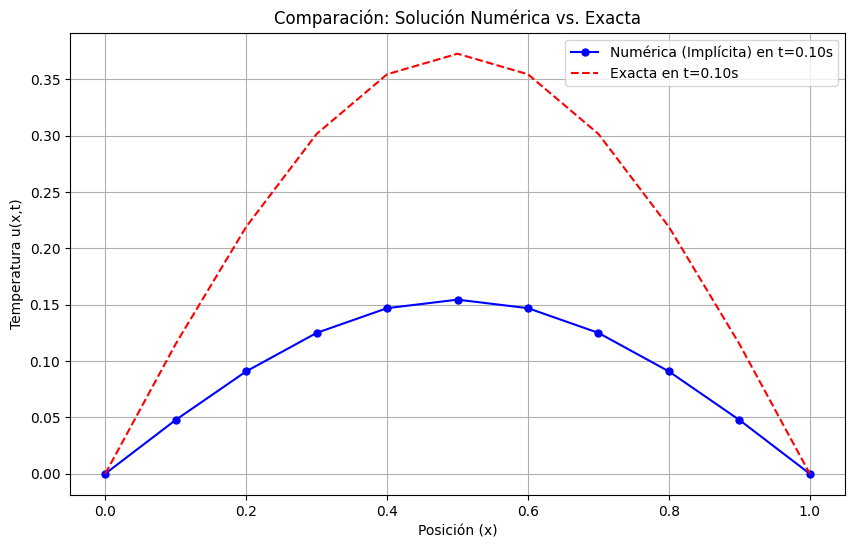

In [193]:
# --- Solución Ejercicio 4 ---

def u_exacta(x, t, alpha_sq): # Calculamos la solucion exacta de la ecuación del calor
    return np.exp(-alpha_sq * (np.pi**2) * t) * np.sin(np.pi * x)

# Define T_final
T_final = j * k # Nos da un t de 0.2

# Elegimos el último paso de tiempo para la comparación
t_comparacion = 0.1

# Obtenemos la solución numérica en ese tiempo (la última fila de U_full)
u_numerica_t_final = U[-1, :]

# Calculate the x-coordinates for plotting
x_full = np.linspace(0, 1, N + 2) # Include boundary points 0 and 1
# Pad u_numerica_t_final with boundary conditions (which are 0)
u_numerica_padded = np.insert(u_numerica_t_final, 0, 0)
u_numerica_padded = np.append(u_numerica_padded, 0)

# Calculamos la solución exacta en ese mismo tiempo
# (Usamos alpha_sq=1.0, definido en las celdas de parámetros)
u_exacta_t_final = u_exacta(x_full, t_comparacion, alpha_sq)

# Graficamos ambas soluciones
plt.figure(figsize=(10, 6))
plt.plot(x_full, u_numerica_padded, 'bo-', label=f'Numérica (Implícita) en t={t_comparacion:.2f}s', markersize=5)
plt.plot(x_full, u_exacta_t_final, 'r--', label=f'Exacta en t={t_comparacion:.2f}s')
plt.title('Comparación: Solución Numérica vs. Exacta')
plt.xlabel('Posición (x)')
plt.ylabel('Temperatura u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

In [189]:
j = 20

In [190]:
U = richardson(A, b, j)

In [191]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.6, j+1)
X, Y = np.meshgrid(x, y)

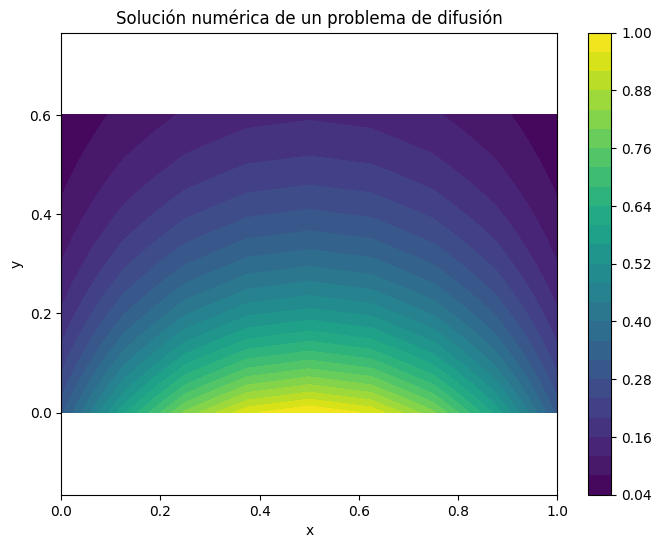

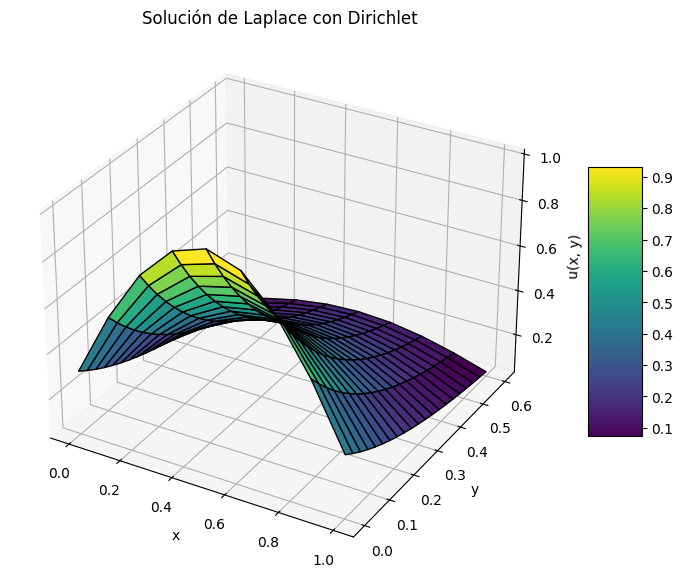

In [192]:
# Mapa de colores

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de difusión')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()